In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sustainable-lifestyle-rating-dataset/lifestyle_sustainability_data.csv


In [2]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/sustainable-lifestyle-rating-dataset/lifestyle_sustainability_data.csv'
df_lifestyle = pd.read_csv(file_path)

# Display basic information about the dataset
df_lifestyle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ParticipantID                  499 non-null    int64 
 1   Age                            499 non-null    int64 
 2   Location                       499 non-null    object
 3   DietType                       499 non-null    object
 4   LocalFoodFrequency             499 non-null    object
 5   TransportationMode             499 non-null    object
 6   EnergySource                   499 non-null    object
 7   HomeType                       499 non-null    object
 8   HomeSize                       499 non-null    int64 
 9   ClothingFrequency              499 non-null    object
 10  SustainableBrands              499 non-null    bool  
 11  EnvironmentalAwareness         499 non-null    int64 
 12  CommunityInvolvement           381 non-null    object
 13  Month

In [3]:
df_lifestyle.head()

,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,1,35,Urban,Mostly Plant-Based,Often,Bike,Renewable,Apartment,800,Rarely,True,5,High,100,1500,Female,Rarely,Composting,High,5
1,2,28,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1500,Sometimes,True,4,Moderate,250,3000,Male,Sometimes,Recycling,Moderate,4
2,3,65,Rural,Mostly Animal-Based,Rarely,Car,Non-Renewable,House,2500,Often,False,2,Low,400,4500,Male,Often,Landfill,Low,1
3,4,42,Urban,Mostly Plant-Based,Often,Walk,Renewable,Apartment,950,Sometimes,True,4,Moderate,150,2000,Female,Rarely,Recycling,High,5
4,5,31,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1800,Often,True,3,Low,300,3500,Non-Binary,Sometimes,Combination,Moderate,3


In [4]:
df_lifestyle.shape

(499, 20)

In [5]:
df_lifestyle.describe(include='all')

,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
count,499.000000,499.000000,499,499,499,499,499,499,499.000000,499,499,499.000000,381,499.000000,499.000000,499,499,499,391,499.000000
unique,NaN,NaN,3,3,4,4,3,3,NaN,4,2,NaN,3,NaN,NaN,4,4,4,3,NaN
top,NaN,NaN,Urban,Mostly Plant-Based,Often,Car,Renewable,House,NaN,Often,True,NaN,Moderate,NaN,NaN,Male,Often,Recycling,Moderate,NaN
freq,NaN,NaN,190,197,148,140,183,228,NaN,148,263,NaN,133,NaN,NaN,176,144,145,139,NaN
mean,250.024048,44.052104,NaN,NaN,NaN,NaN,NaN,NaN,1518.046092,NaN,NaN,3.062124,NaN,291.963928,3139.521042,NaN,NaN,NaN,NaN,3.430862
std,144.233925,14.904828,NaN,NaN,NaN,NaN,NaN,NaN,672.212235,NaN,NaN,1.342145,NaN,120.482275,1224.609306,NaN,NaN,NaN,NaN,1.502585
min,1.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,407.000000,NaN,NaN,1.000000,NaN,55.000000,536.000000,NaN,NaN,NaN,NaN,1.000000
25%,125.500000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,951.500000,NaN,NaN,2.000000,NaN,185.000000,2000.000000,NaN,NaN,NaN,NaN,2.000000
50%,250.000000,44.000000,NaN,NaN,NaN,NaN,NaN,NaN,1450.000000,NaN,NaN,3.000000,NaN,295.000000,3350.000000,NaN,NaN,NaN,NaN,4.000000
75%,374.500000,58.000000,NaN,NaN,NaN,NaN,NaN,NaN,1995.000000,NaN,NaN,4.000000,NaN,400.000000,4100.000000,NaN,NaN,NaN,NaN,5.000000


In [6]:
df_lifestyle.isnull().sum(axis=0)

ParticipantID                      0
Age                                0
Location                           0
DietType                           0
LocalFoodFrequency                 0
TransportationMode                 0
EnergySource                       0
HomeType                           0
HomeSize                           0
ClothingFrequency                  0
SustainableBrands                  0
EnvironmentalAwareness             0
CommunityInvolvement             118
MonthlyElectricityConsumption      0
MonthlyWaterConsumption            0
Gender                             0
UsingPlasticProducts               0
DisposalMethods                    0
PhysicalActivities               108
Rating                             0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


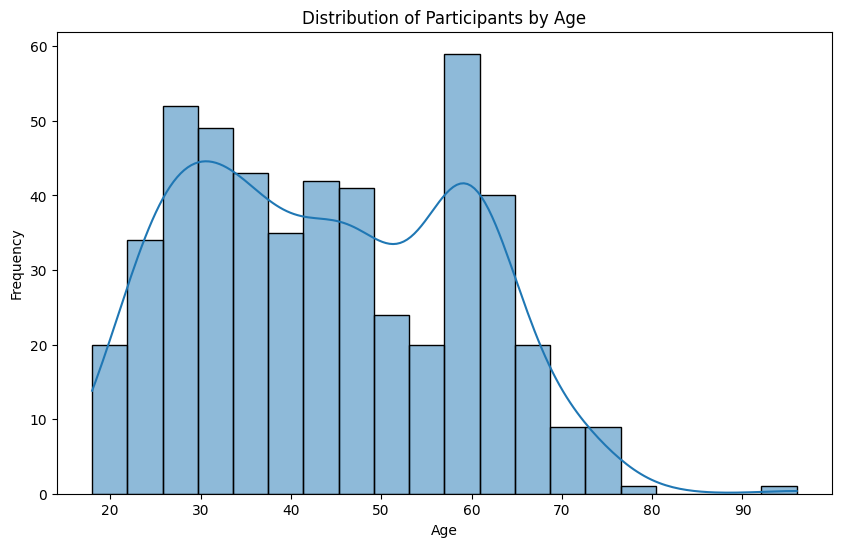

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_lifestyle['Age'], bins=20, kde=True)
plt.title('Distribution of Participants by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

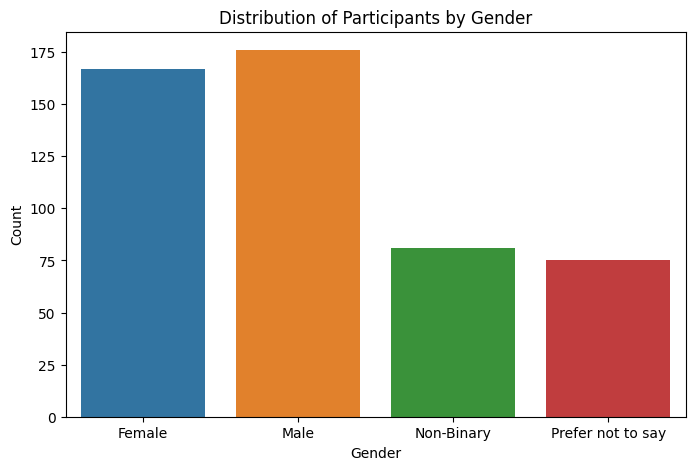

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df_lifestyle)
plt.title('Distribution of Participants by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

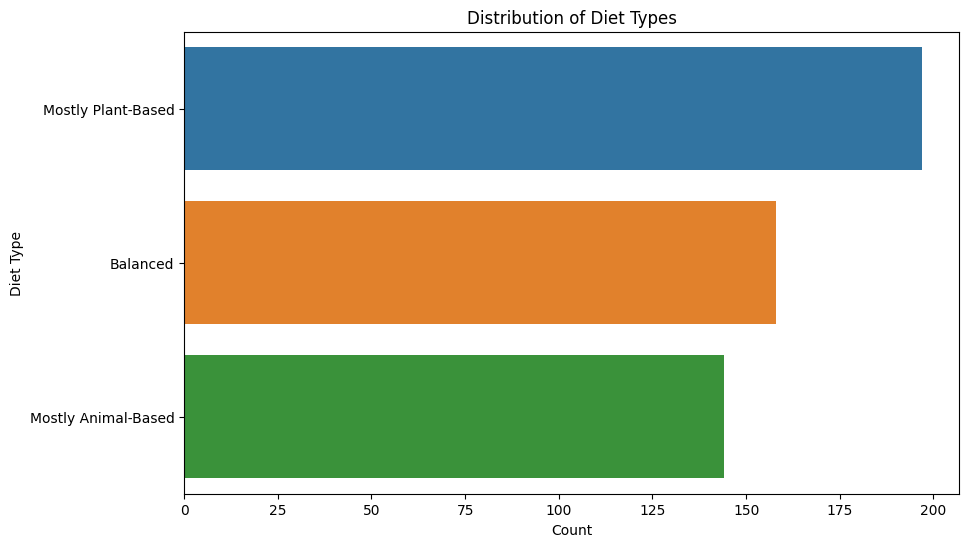

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(y='DietType', data=df_lifestyle, order=df_lifestyle['DietType'].value_counts().index)
plt.title('Distribution of Diet Types')
plt.xlabel('Count')
plt.ylabel('Diet Type')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


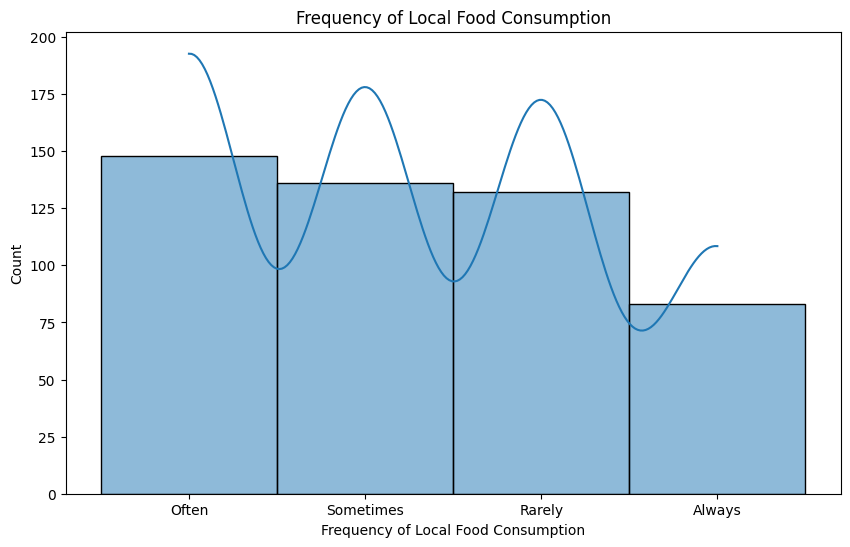

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df_lifestyle['LocalFoodFrequency'], bins=10, kde=True)
plt.title('Frequency of Local Food Consumption')
plt.xlabel('Frequency of Local Food Consumption')
plt.ylabel('Count')
plt.show()

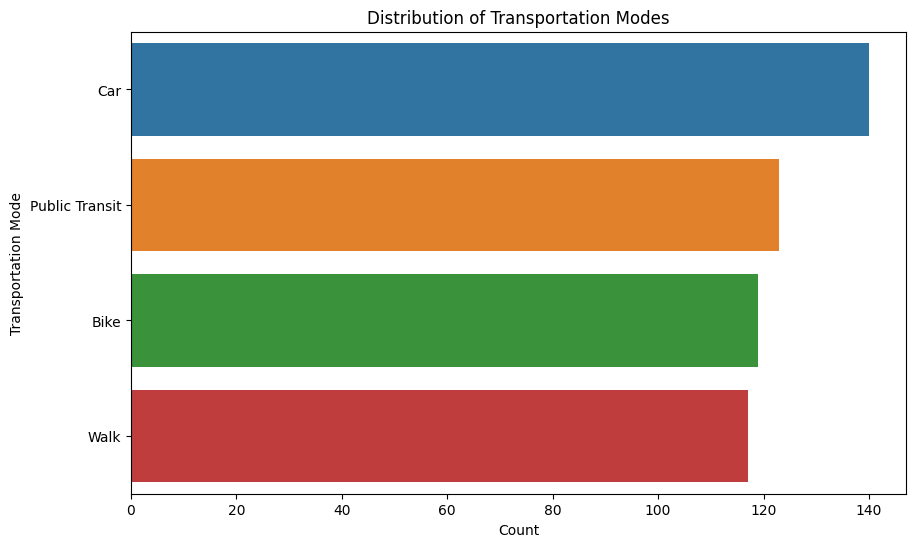

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(y='TransportationMode', data=df_lifestyle, order=df_lifestyle['TransportationMode'].value_counts().index)
plt.title('Distribution of Transportation Modes')
plt.xlabel('Count')
plt.ylabel('Transportation Mode')
plt.show()

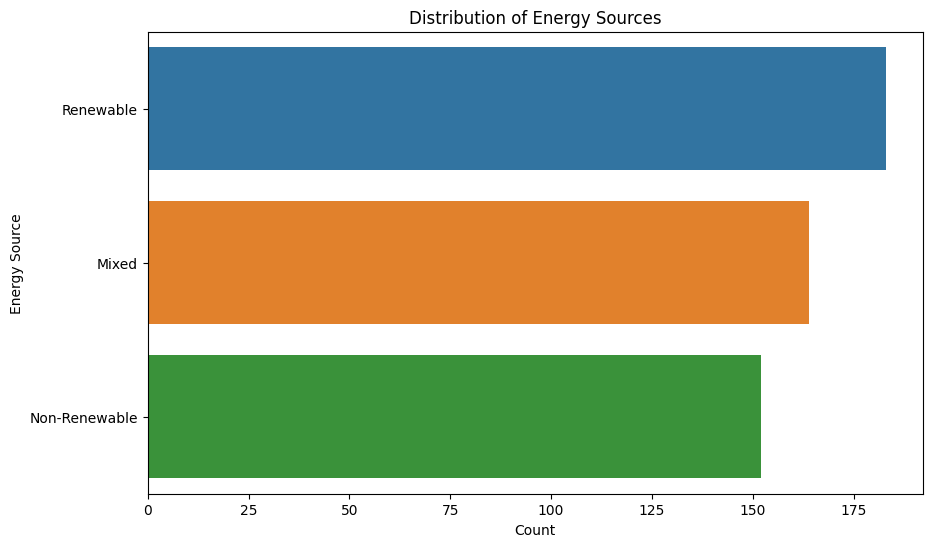

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(y='EnergySource', data=df_lifestyle, order=df_lifestyle['EnergySource'].value_counts().index)
plt.title('Distribution of Energy Sources')
plt.xlabel('Count')
plt.ylabel('Energy Source')
plt.show()

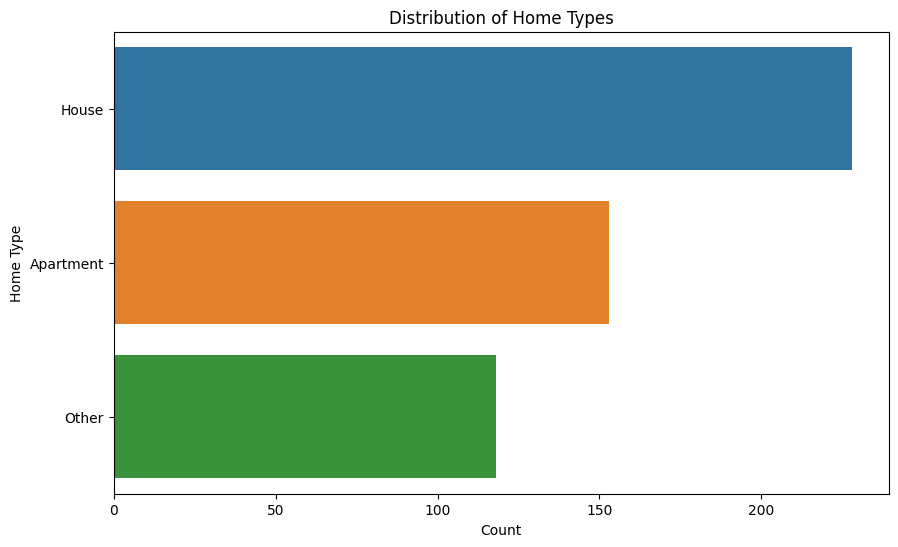

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(y='HomeType', data=df_lifestyle, order=df_lifestyle['HomeType'].value_counts().index)
plt.title('Distribution of Home Types')
plt.xlabel('Count')
plt.ylabel('Home Type')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


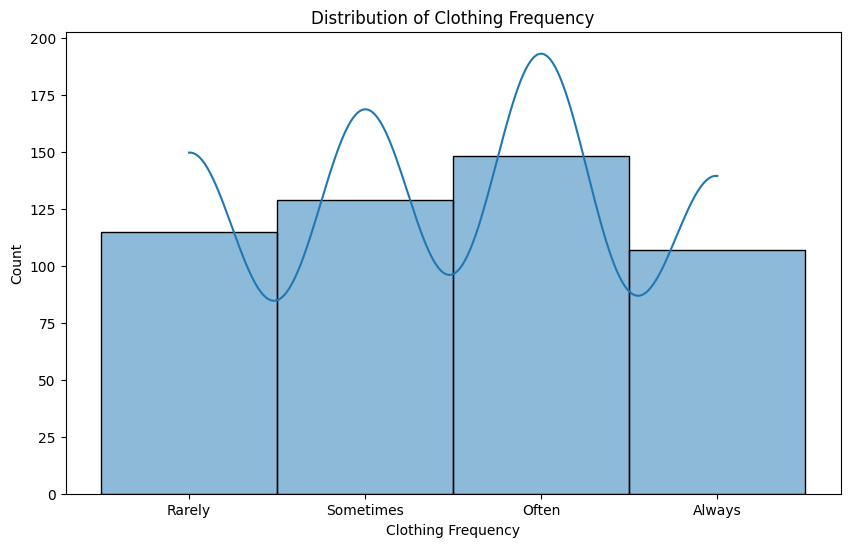

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df_lifestyle['ClothingFrequency'], bins=10, kde=True)
plt.title('Distribution of Clothing Frequency')
plt.xlabel('Clothing Frequency')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/opt/conda/lib/python3.10/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


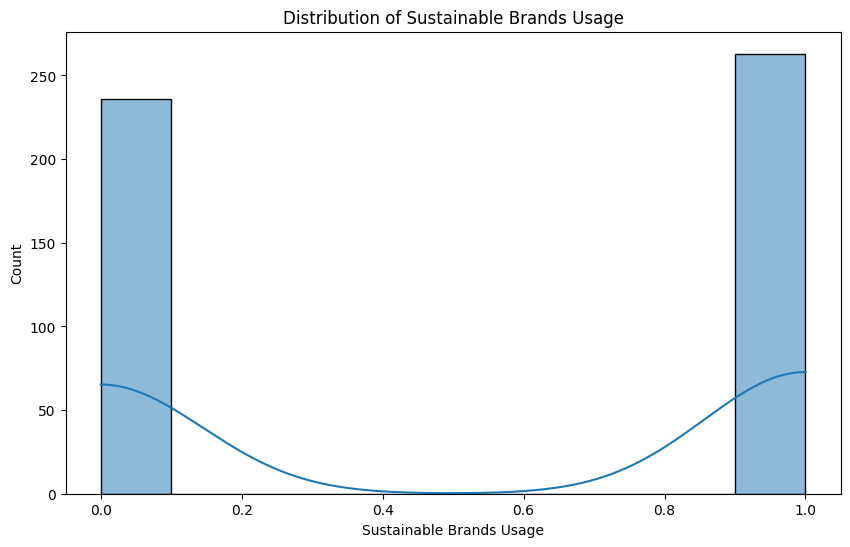

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df_lifestyle['SustainableBrands'], bins=10, kde=True)
plt.title('Distribution of Sustainable Brands Usage')
plt.xlabel('Sustainable Brands Usage')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


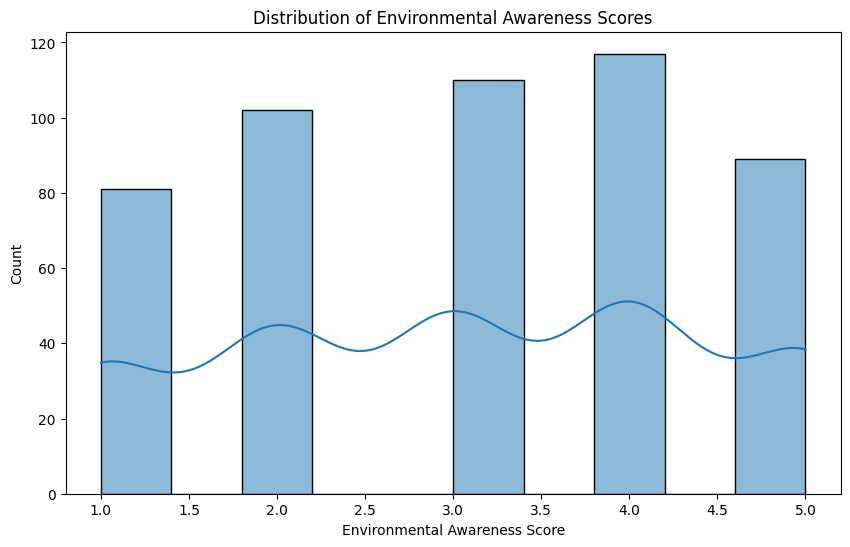

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df_lifestyle['EnvironmentalAwareness'], bins=10, kde=True)
plt.title('Distribution of Environmental Awareness Scores')
plt.xlabel('Environmental Awareness Score')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


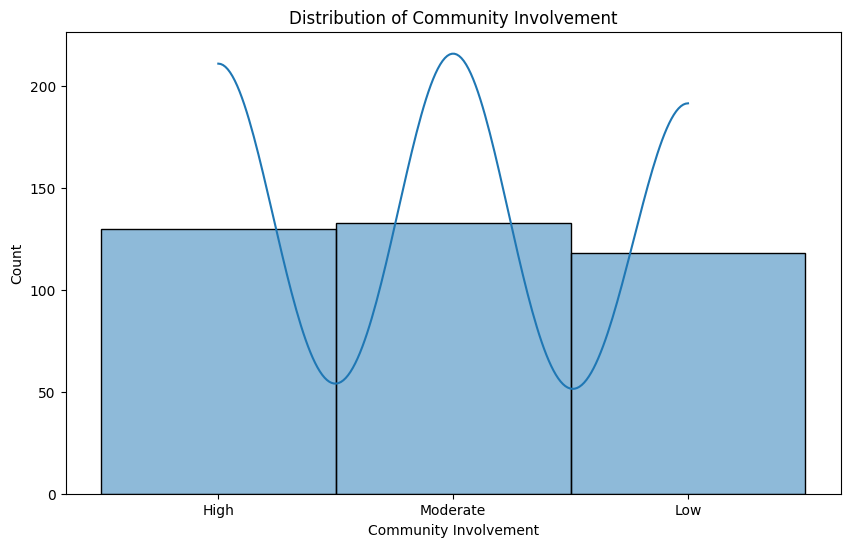

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df_lifestyle['CommunityInvolvement'], bins=10, kde=True)
plt.title('Distribution of Community Involvement')
plt.xlabel('Community Involvement')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


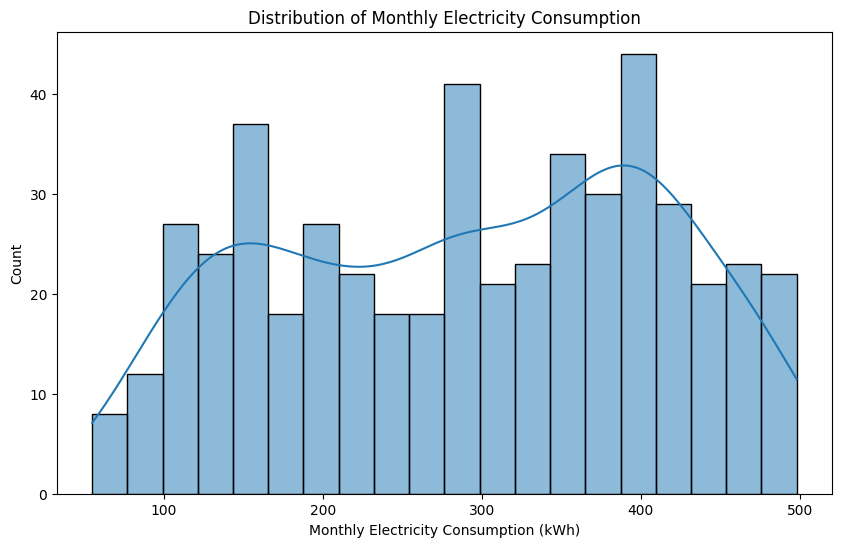

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df_lifestyle['MonthlyElectricityConsumption'], bins=20, kde=True)
plt.title('Distribution of Monthly Electricity Consumption')
plt.xlabel('Monthly Electricity Consumption (kWh)')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


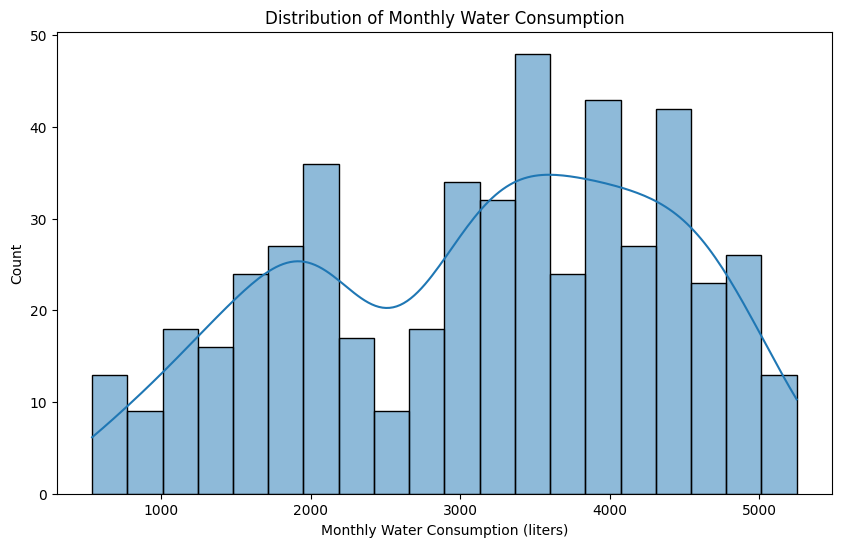

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df_lifestyle['MonthlyWaterConsumption'], bins=20, kde=True)
plt.title('Distribution of Monthly Water Consumption')
plt.xlabel('Monthly Water Consumption (liters)')
plt.ylabel('Count')
plt.show()

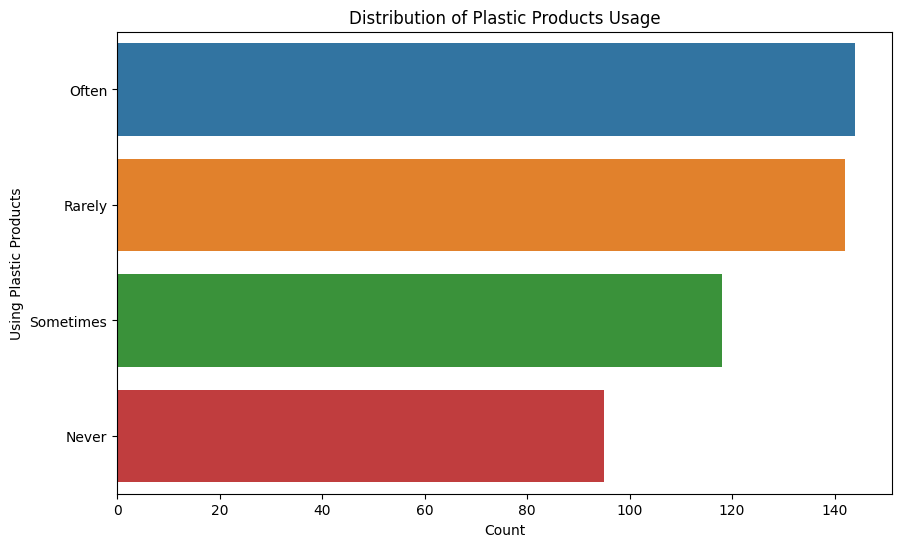

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(y='UsingPlasticProducts', data=df_lifestyle, order=df_lifestyle['UsingPlasticProducts'].value_counts().index)
plt.title('Distribution of Plastic Products Usage')
plt.xlabel('Count')
plt.ylabel('Using Plastic Products')
plt.show()

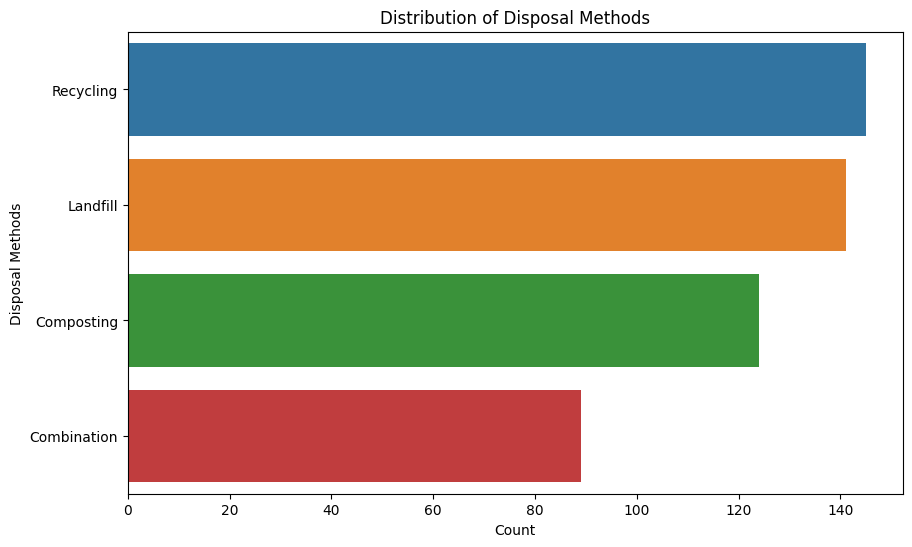

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(y='DisposalMethods', data=df_lifestyle, order=df_lifestyle['DisposalMethods'].value_counts().index)
plt.title('Distribution of Disposal Methods')
plt.xlabel('Count')
plt.ylabel('Disposal Methods')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


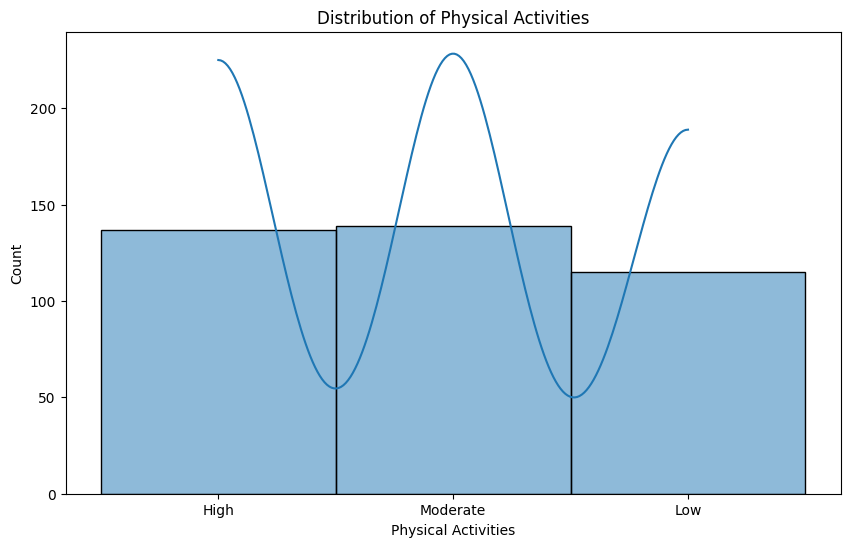

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df_lifestyle['PhysicalActivities'], bins=10, kde=True)
plt.title('Distribution of Physical Activities')
plt.xlabel('Physical Activities')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


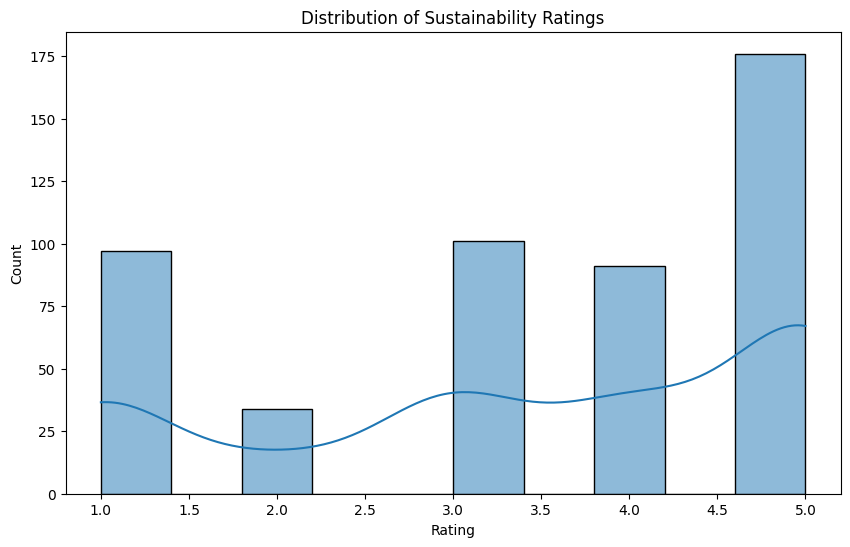

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df_lifestyle['Rating'], bins=10, kde=True)
plt.title('Distribution of Sustainability Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

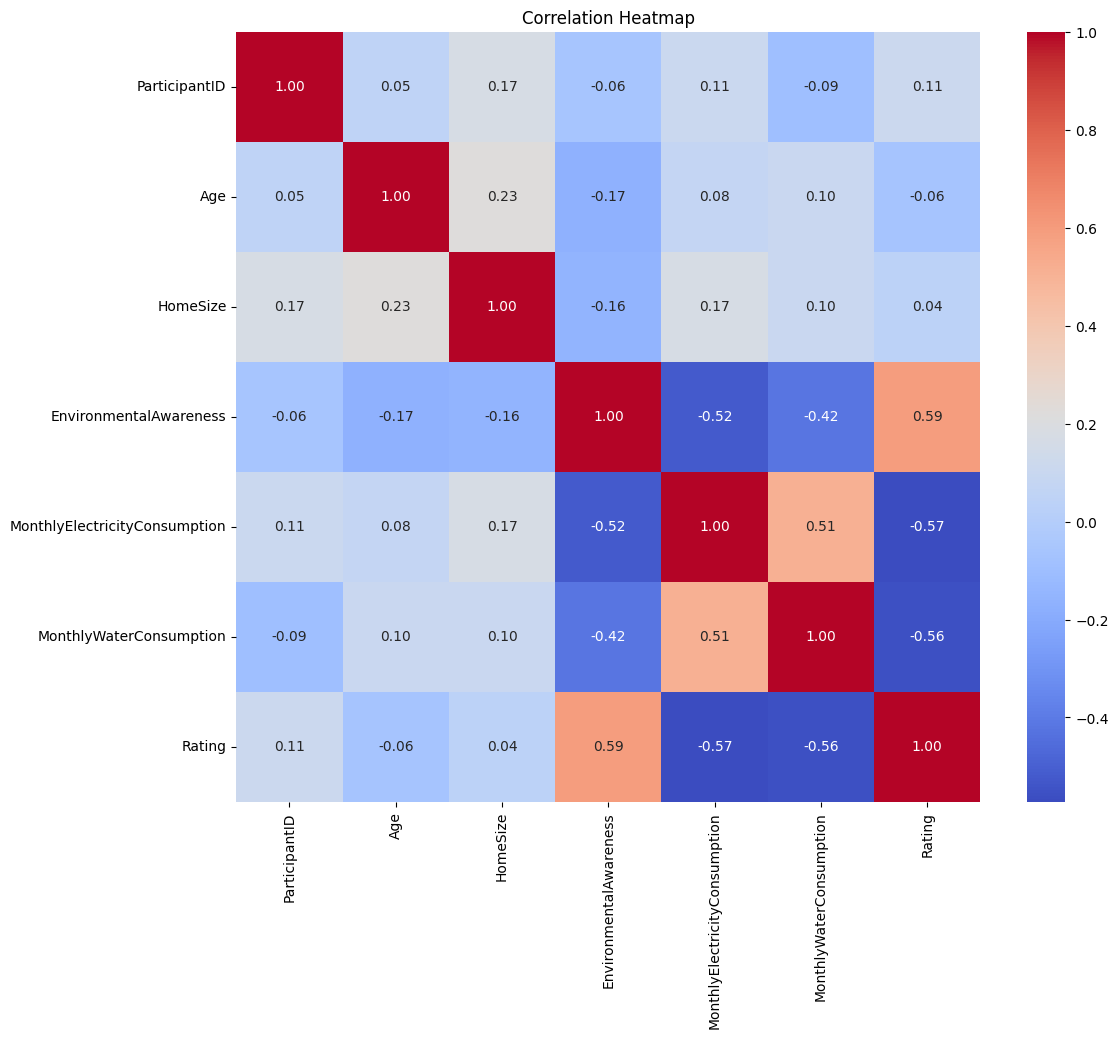

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation analysis
numeric_cols = df_lifestyle.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

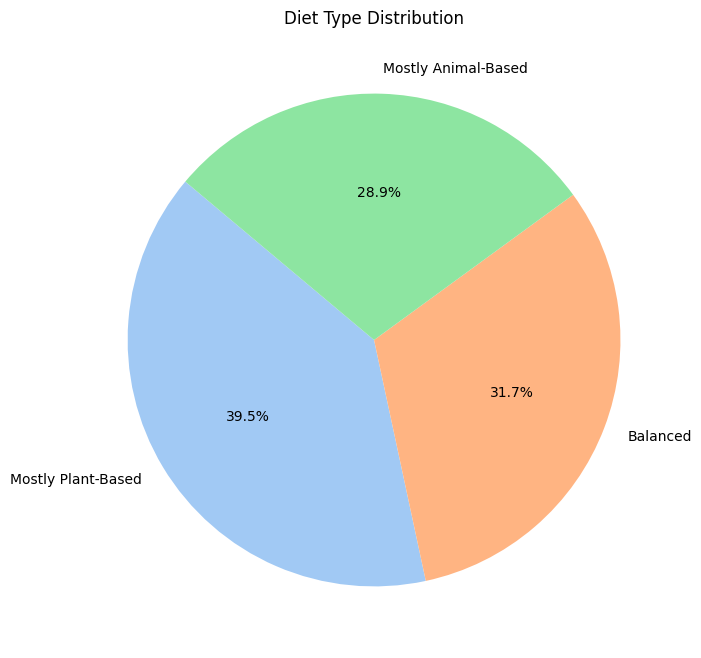

In [25]:
plt.figure(figsize=(8, 8))
diet_type_counts = df_lifestyle['DietType'].value_counts()
plt.pie(diet_type_counts, labels=diet_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Diet Type Distribution')
plt.show()

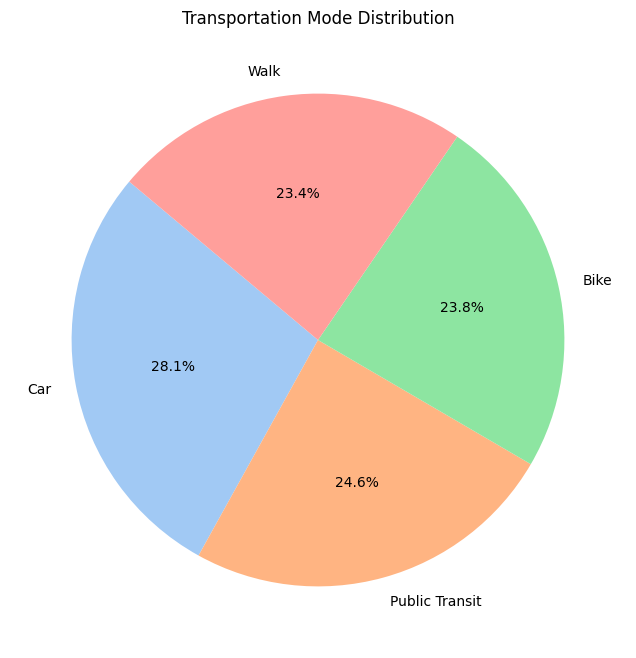

In [26]:
plt.figure(figsize=(8, 8))
transportation_mode_counts = df_lifestyle['TransportationMode'].value_counts()
plt.pie(transportation_mode_counts, labels=transportation_mode_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Transportation Mode Distribution')
plt.show()

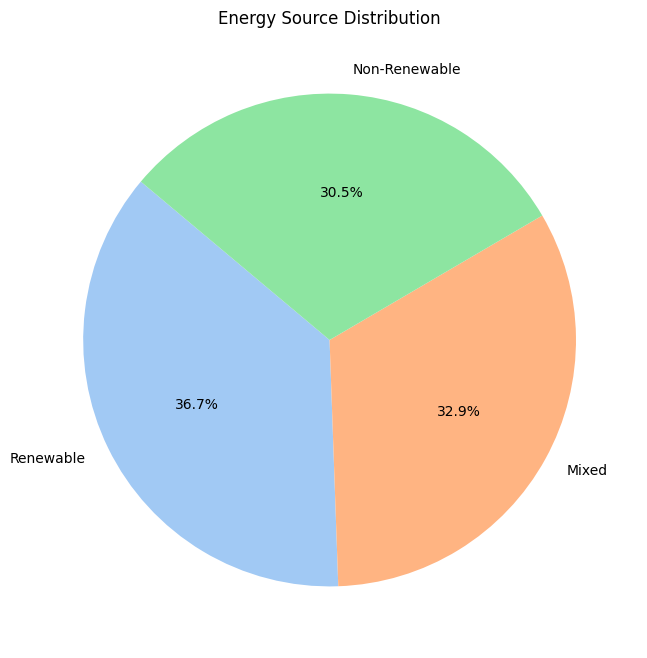

In [27]:
plt.figure(figsize=(8, 8))
energy_source_counts = df_lifestyle['EnergySource'].value_counts()
plt.pie(energy_source_counts, labels=energy_source_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Energy Source Distribution')
plt.show()